#Contributors 💙 Madhu Bala Sankaralingam 💙 Melissa Wu 💙 Shariq Lalani

 **Track 2 - Ratings Prediction**


# EDA

### Import Libraries

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Descriptions

1. business.csv - Contains business data including location data, attributes, and categories.
2. user.csv - User data including the user's friend mapping and all the metadata associated with the user
3. review.csv - Contains full review text data including the user_id that wrote the review and the business_id the review is written for.




### Data Loading

In [4]:
# Load datasets
business_df = pd.read_csv('business.csv')
user_df = pd.read_csv('user.csv')
review_df = pd.read_csv('review.csv')

# Print first 5 rows of each dataset
display(business_df.head())
display(user_df.head())
display(review_df.head())


,attributes.GoodForMeal,hours.Wednesday,stars,attributes.NoiseLevel,hours.Monday,attributes.DietaryRestrictions,hours.Tuesday,hours.Sunday,attributes.RestaurantsGoodForGroups,attributes.DriveThru,...,attributes.Music,attributes.DogsAllowed,attributes.AcceptsInsurance,attributes.ByAppointmentOnly,hours.Friday,review_count,attributes.GoodForKids,attributes.BusinessParking,attributes.BYOBCorkage,attributes.HairSpecializesIn
0,NaN,7:0-20:0,4.0,NaN,7:0-20:0,NaN,7:0-20:0,7:0-21:0,NaN,NaN,...,NaN,NaN,NaN,False,7:0-21:0,80,NaN,"{'garage': False, 'street': True, 'validated':...",NaN,NaN
1,"{'dessert': False, 'latenight': False, 'lunch'...",10:0-20:0,4.5,u'average',10:0-18:0,NaN,10:0-20:0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,10:0-20:0,100,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN
2,"{'dessert': True, 'latenight': None, 'lunch': ...",13:30-22:0,4.0,u'average',NaN,NaN,13:30-22:0,13:30-22:0,True,NaN,...,NaN,False,NaN,NaN,13:30-23:0,245,False,"{u'valet': False, u'garage': None, u'street': ...",NaN,NaN
3,"{'dessert': False, 'latenight': False, 'lunch'...",11:30-20:30,4.5,u'quiet',11:30-20:30,NaN,11:30-20:30,NaN,False,NaN,...,NaN,NaN,NaN,NaN,11:30-20:30,205,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN
4,NaN,8:0-18:0,4.0,u'average',8:0-18:0,NaN,8:0-18:0,10:0-17:0,True,NaN,...,NaN,NaN,NaN,NaN,8:0-18:0,40,False,"{'garage': False, 'street': True, 'validated':...",NaN,NaN


,user_id,compliment_plain,funny,name,average_stars,review_count,useful,compliment_profile,compliment_more,compliment_list,...,friends,compliment_cute,yelping_since,cool,fans,compliment_hot,elite,compliment_cool,compliment_funny,compliment_writer
0,j14WgRoU_-2ZE1aw1dXrJg,7054,13066,Daniel,3.74,4333,43091,184,264,251,...,"BW_Lpb14P7CTQwHlaek0_w,Lpcd2GQEkAzFoMfP8vUYWw,...",157,2009-01-25 04:35:42,27281,3138,1145,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3131,3131,1521
1,E9kcWJdJUHuTKfQurPljwA,6,102,Mike,3.73,358,399,2,7,0,...,"3YRIaEjOPoBEz4xoXaJ1jQ,HzeVbLwHoWdNGA1IYWJ-nw",0,2008-12-11 22:11:56,143,23,4,NaN,12,12,5
2,MGPQVLsODMm9ZtYQW-g_OA,3396,10461,Jelena,4.06,1807,17331,206,167,130,...,"cEDMie5DjE_00sJ23H2q9Q,7an-zIbFKvGxjpeNN9H9ow,...",395,2008-01-19 22:50:00,13734,828,2177,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...",1915,1915,696
3,rppTTi-kfF8-qyiArNemag,23,149,Helen,3.33,460,700,2,11,0,...,"olLL4rSOwJcYn--fGisiFA,nnImk681KaRqUVHlSfZjGQ,...",2,2006-01-24 14:33:32,425,49,25,"2010,2012,2013,2014,2015,2016,2017,2018",43,43,20
4,KYBEVBAP7QUlt1LjmatTJg,117,1982,Matthew,3.81,460,1500,29,34,27,...,"vt4nvD7FNvIMel47ikMifQ,EVlNHC3J1Y46LN4fkTwfvA,...",58,2007-07-12 14:46:03,1210,63,256,"2008,2009,2010,2011",230,230,54


,business_id,funny,user_id,stars,review_id,cool,useful,date,text
0,zsk5qJ179aZvgtz62JCj7A,0,9oUt200IoLaHBrJWKz77yQ,5.0,V6O072D-Zmn_5zXG1yIe3g,0,0,2020-06-08 05:16:35,The staff was super friendly and the bikes wer...
1,QCPhg4xl22h2IuCKGmkaNw,0,fCtPVdTI8zDbgwNdI--tnw,1.0,wbmfZlPAEr1Vtgki8xlsnw,0,0,2018-07-29 21:13:35,Worst customer service I have ever experienced...
2,63OsIhZ4XVRVLq0LUUXUIg,0,3b8bc-2fwvatCCNncLqsrg,1.0,cYrTgARUjKGGKH0LUe5BFQ,0,3,2018-06-20 19:13:10,Crooks. All the negative reviews here are righ...
3,QkHF8eeJx9R7S95ifUtDIw,1,drDnd-DrI1svoT1lopOWdw,5.0,qSG2reK_J9Hosyyx3WYv7Q,0,0,2019-03-18 17:59:37,"Honest, timely and respectful people. Great w..."
4,mhrW9O0O5hXGXGnEYBVoag,1,5dbgriguf-7KM50FfQ_WEw,5.0,AwIxkLYkbksnfFoXJuJcVg,0,0,2017-04-22 02:49:21,Totally amazing meal. Fantastic service. Go to...


### Data Overview


In [5]:
# Overview of the datasets
print(business_df.info())
print(user_df.info())
print(review_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29527 entries, 0 to 29526
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   attributes.GoodForMeal                 12776 non-null  object 
 1   hours.Wednesday                        26354 non-null  object 
 2   stars                                  29527 non-null  float64
 3   attributes.NoiseLevel                  15209 non-null  object 
 4   hours.Monday                           24126 non-null  object 
 5   attributes.DietaryRestrictions         17 non-null     object 
 6   hours.Tuesday                          25274 non-null  object 
 7   hours.Sunday                           20544 non-null  object 
 8   attributes.RestaurantsGoodForGroups    15657 non-null  object 
 9   attributes.DriveThru                   2184 non-null   object 
 10  hours.Thursday                         26778 non-null  object 
 11  at

### Descriptive Statistics

Generate summary statistics for numeric features to understand distributions.

In [6]:
# Descriptive statistics for business data
display(business_df.describe())

# Descriptive statistics for user data
display(user_df.describe())

# Descriptive statistics for review data
display(review_df.describe())


,stars,is_open,latitude,attributes.RestaurantsPriceRange2,longitude,review_count
count,29527.000000,29527.000000,29527.000000,22274.000000,29527.000000,29527.000000
mean,3.673062,0.805263,36.325031,1.806097,-89.694698,135.439598
std,0.829728,0.396005,5.521646,0.580344,15.080800,245.851277
min,1.000000,0.000000,27.555127,1.000000,-120.083745,5.000000
25%,3.000000,1.000000,32.084816,1.000000,-90.347961,24.000000
50%,4.000000,1.000000,38.645699,2.000000,-86.148824,64.000000
75%,4.500000,1.000000,39.948683,2.000000,-75.442727,155.000000
max,5.000000,1.000000,53.649743,4.000000,-74.693742,7568.000000


,compliment_plain,funny,average_stars,review_count,useful,compliment_profile,compliment_more,compliment_list,compliment_note,compliment_photos,compliment_cute,cool,fans,compliment_hot,compliment_cool,compliment_funny,compliment_writer
count,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000
mean,21.099158,95.617384,3.732576,83.996490,233.063995,0.874720,1.413425,0.327662,8.337480,7.502321,0.523623,152.365468,7.319332,9.875519,16.879940,16.879940,6.299718
std,329.330138,1327.614818,0.897185,231.775887,2223.948596,19.377055,19.897978,8.624596,82.917613,183.038375,10.714477,1956.517442,51.605991,154.384508,234.434437,234.434437,84.913466
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.330000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,3.880000,20.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,15.000000,4.310000,68.000000,71.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,23.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,28974.000000,173096.000000,5.000000,16567.000000,205765.000000,3144.000000,2986.000000,1165.000000,4751.000000,28205.000000,1277.000000,199878.000000,3642.000000,12596.000000,23476.000000,23476.000000,9821.000000


,funny,stars,cool,useful
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.331120,3.747780,0.514180,1.195740
std,1.651912,1.477799,2.460943,3.188697
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000
75%,0.000000,5.000000,0.000000,1.000000
max,113.000000,5.000000,165.000000,158.000000


### Handling missing data

In [7]:
# Identify Missing data
missing_data_bus = business_df.isnull().sum()
missing_data_bus = missing_data_bus[missing_data_bus > 0]
print(missing_data_bus)

missing_data_user = user_df.isnull().sum()
missing_data_user = missing_data_user[missing_data_user > 0]
print(missing_data_user)

missing_data_rev = review_df.isnull().sum()
missing_data_rev = missing_data_rev[missing_data_rev > 0]
print(missing_data_rev)

attributes.GoodForMeal                   16751
hours.Wednesday                           3173
attributes.NoiseLevel                    14318
hours.Monday                              5401
attributes.DietaryRestrictions           29510
hours.Tuesday                             4253
hours.Sunday                              8983
attributes.RestaurantsGoodForGroups      13870
attributes.DriveThru                     27343
hours.Thursday                            2749
attributes.WheelchairAccessible          20717
attributes.RestaurantsReservations       13738
hours                                     2397
postal_code                                  8
hours.Saturday                            4178
attributes.WiFi                          11010
attributes.RestaurantsTakeOut            11765
attributes.Ambience                      13583
attributes.BusinessAcceptsBitcoin        24565
attributes.BYOB                          27333
attributes.BikeParking                    9217
attributes.Be

Initially, we had a strong intuition from both customer and business perspectives that attributes such as Restaurants Price Range, Ambiance, Accepts Credit Cards, Restaurants Take Out, Noise Level, Business Parking, and Wi-Fi would be significant. We formulated our hypothesis based on this assumption and decided to eliminate columns with more than 50% null values on the business dataframe. Ultimately, we confirmed that these attributes aligned with our initial expectations. With this approach that both our logical reasoning and technical analysis led us to the same results, so we decided that we will proceed with this approach.

Another method that we tried is imputating on all categorical (using mode) and numerical columns (using mean) with at least 50% of non-null values and a version where we only performed imputation on the business hours columns. However, these all led to lower performance in all models. We hypothesize that imputation caused artificial clusters that didn't exist or properly represent the data.


Then after training the model and based on the feedback we changed the threshold value and decided to have it as 60% and drop the rows with missing values based on the model performance

In [8]:
# Drop columns with more than 60% NaN values - business_df
threshold = 0.60 * len(business_df)
business_df.dropna(thresh=threshold, axis=1, inplace=True)
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29527 entries, 0 to 29526
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hours.Wednesday                        26354 non-null  object 
 1   stars                                  29527 non-null  float64
 2   hours.Monday                           24126 non-null  object 
 3   hours.Tuesday                          25274 non-null  object 
 4   hours.Sunday                           20544 non-null  object 
 5   hours.Thursday                         26778 non-null  object 
 6   business_id                            29527 non-null  object 
 7   hours                                  27130 non-null  object 
 8   postal_code                            29519 non-null  object 
 9   is_open                                29527 non-null  int64  
 10  state                                  29527 non-null  object 
 11  ho

Dropping columns with a maximum of 20% missing values in user_df

In [9]:
# Drop columns with more than 80% NaN values - user_df
threshold = 0.8 * len(user_df)
user_df.dropna(thresh=threshold, axis=1, inplace=True)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             45019 non-null  object 
 1   compliment_plain    45019 non-null  int64  
 2   funny               45019 non-null  int64  
 3   name                45017 non-null  object 
 4   average_stars       45019 non-null  float64
 5   review_count        45019 non-null  int64  
 6   useful              45019 non-null  int64  
 7   compliment_profile  45019 non-null  int64  
 8   compliment_more     45019 non-null  int64  
 9   compliment_list     45019 non-null  int64  
 10  compliment_note     45019 non-null  int64  
 11  compliment_photos   45019 non-null  int64  
 12  compliment_cute     45019 non-null  int64  
 13  yelping_since       45019 non-null  object 
 14  cool                45019 non-null  int64  
 15  fans                45019 non-null  int64  
 16  comp

Final cleanup - Dropping rows with missing values

In [10]:
# Drop rows with missing values
business_cleaned_df = business_df.dropna()
user_cleaned_df = user_df.dropna()
review_cleaned_df = review_df.dropna()

business_cleaned_df.info()
user_cleaned_df.info()
review_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9114 entries, 0 to 29521
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hours.Wednesday                        9114 non-null   object 
 1   stars                                  9114 non-null   float64
 2   hours.Monday                           9114 non-null   object 
 3   hours.Tuesday                          9114 non-null   object 
 4   hours.Sunday                           9114 non-null   object 
 5   hours.Thursday                         9114 non-null   object 
 6   business_id                            9114 non-null   object 
 7   hours                                  9114 non-null   object 
 8   postal_code                            9114 non-null   object 
 9   is_open                                9114 non-null   int64  
 10  state                                  9114 non-null   object 
 11  hours.Sa

In [11]:
# For Tableau visualization
cleaned_df = pd.merge(business_cleaned_df, review_cleaned_df, on='business_id', how= 'inner')
cleaned_df.to_csv('cleaned_data.csv', index=False)

## Visualization

### Distribution of Ratings
Visualize the distribution of ratings using the stars column.

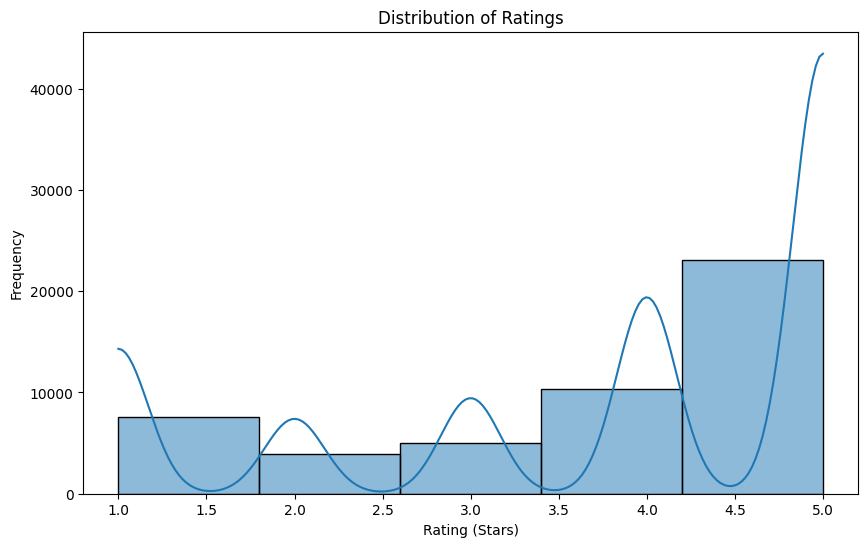

In [12]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(review_cleaned_df['stars'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.show()

Visualizing Review count vs business ratings to see if there is a pattern that businesses with higher ratings have generally higher review counts than those with lower review counts

> And we see that higher the review counts better the rating for rating values 3- 4.5 evidently from the below scatter and box plot



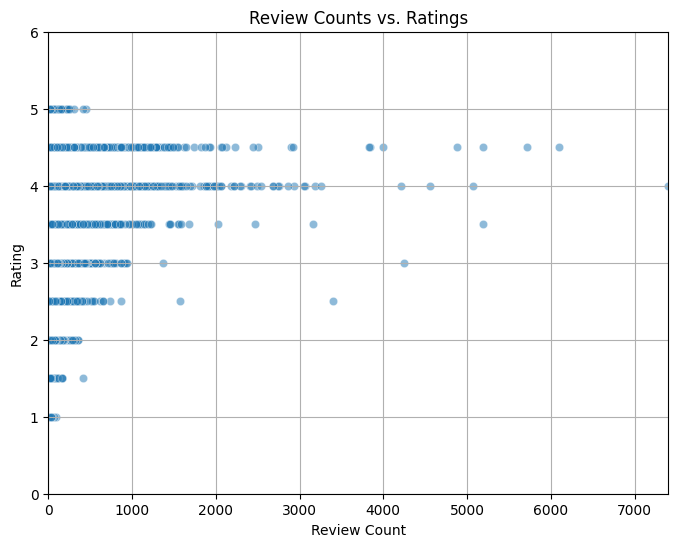

In [13]:
# Distribution plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=business_cleaned_df, x='review_count', y='stars', alpha=0.5)
plt.title('Review Counts vs. Ratings')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.xlim(0, business_cleaned_df['review_count'].max())
plt.ylim(0, 6)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


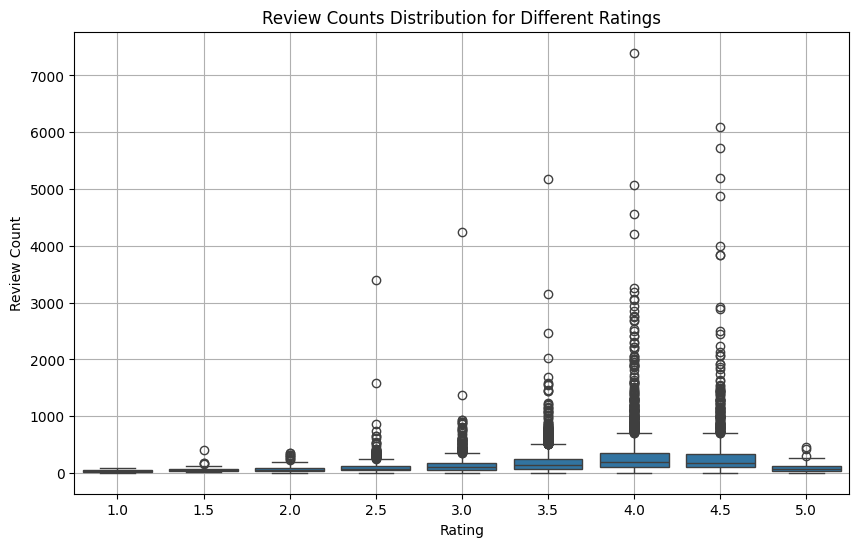

In [14]:
# Box plot to show the distribution of review counts for each rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=business_cleaned_df, x='stars', y='review_count')
plt.title('Review Counts Distribution for Different Ratings')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

## Merge Datasets

In [15]:
combined_df = pd.merge(business_cleaned_df, review_cleaned_df, on='business_id', how= 'inner')
combined_df = pd.merge(combined_df, user_cleaned_df, on='user_id')
combined_df

,hours.Wednesday,stars_x,hours.Monday,hours.Tuesday,hours.Sunday,hours.Thursday,business_id,hours,postal_code,is_open,...,compliment_note,compliment_photos,compliment_cute,yelping_since,cool_y,fans,compliment_hot,compliment_cool,compliment_funny,compliment_writer
0,7:0-20:0,4.0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-20:0,MTSW4McQd7CbVtyjqoe9mw,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",19107,1,...,0,0,0,2012-05-24 16:15:28,12,0,0,0,0,1
1,10:0-22:0,2.5,11:0-22:0,11:0-22:0,11:0-21:0,11:0-20:0,9OG5YkX1g2GReZM0AskizA,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",89502,1,...,1,0,0,2007-03-27 12:02:22,28,2,0,6,6,1
2,10:0-22:0,2.5,11:0-22:0,11:0-22:0,11:0-21:0,11:0-20:0,9OG5YkX1g2GReZM0AskizA,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",89502,1,...,1,0,0,2010-01-30 04:32:22,17,0,2,2,2,1
3,10:0-22:0,2.5,11:0-22:0,11:0-22:0,11:0-21:0,11:0-20:0,9OG5YkX1g2GReZM0AskizA,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",89502,1,...,1,0,0,2016-08-17 23:52:49,63,1,1,5,5,0
4,10:0-22:0,2.5,11:0-22:0,11:0-22:0,11:0-21:0,11:0-20:0,9OG5YkX1g2GReZM0AskizA,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",89502,1,...,2,0,0,2013-07-18 19:49:20,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20121,15:0-21:0,4.0,15:0-21:0,15:0-21:0,15:0-21:0,15:0-21:0,uriD7RFuHhLJeDdKaf0nFA,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",93105,0,...,0,0,0,2013-01-20 17:20:49,1,1,0,0,0,1
20122,9:0-19:30,3.0,9:0-19:30,9:0-19:30,11:0-19:30,9:0-19:30,8n93L-ilMAsvwUatarykSg,"{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'...",19104,0,...,0,0,0,2010-03-28 03:05:57,2,0,0,0,0,0
20123,16:0-21:0,4.0,0:0-0:0,16:0-21:0,12:0-21:0,16:0-21:0,2MAQeAqmD8enCT2ZYqUgIQ,"{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",37201,0,...,0,0,0,2014-07-30 23:58:19,0,0,0,0,0,0
20124,16:0-21:0,4.0,0:0-0:0,16:0-21:0,12:0-21:0,16:0-21:0,2MAQeAqmD8enCT2ZYqUgIQ,"{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",37201,0,...,0,1,0,2015-09-16 11:27:59,0,0,0,0,0,0


After our initial merge, we have 20,126 rows and 54 columns

### Data Exploration on Combined dataframe

In [16]:
print(combined_df.info())
display(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20126 entries, 0 to 20125
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hours.Wednesday                        20126 non-null  object 
 1   stars_x                                20126 non-null  float64
 2   hours.Monday                           20126 non-null  object 
 3   hours.Tuesday                          20126 non-null  object 
 4   hours.Sunday                           20126 non-null  object 
 5   hours.Thursday                         20126 non-null  object 
 6   business_id                            20126 non-null  object 
 7   hours                                  20126 non-null  object 
 8   postal_code                            20126 non-null  object 
 9   is_open                                20126 non-null  int64  
 10  state                                  20126 non-null  object 
 11  ho

,stars_x,is_open,latitude,attributes.RestaurantsPriceRange2,longitude,review_count_x,funny_x,stars_y,cool_x,useful_x,...,compliment_list,compliment_note,compliment_photos,compliment_cute,cool_y,fans,compliment_hot,compliment_cool,compliment_funny,compliment_writer
count,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,...,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000
mean,3.730175,0.826592,35.596037,1.854815,-88.813130,550.689655,0.296532,3.724039,0.463232,0.920054,...,0.490907,13.833002,11.992497,0.713654,260.558581,11.766521,14.753404,26.902117,26.902117,9.368429
std,0.603137,0.378609,5.003476,0.512103,14.427271,890.841372,1.764273,1.404187,2.701886,2.988561,...,12.452423,111.385969,171.178388,14.200801,2409.395744,69.472099,188.866453,284.059180,284.059180,76.857555
min,1.000000,0.000000,27.564457,1.000000,-119.999993,5.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.000000,29.956753,2.000000,-90.212020,119.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,38.585571,2.000000,-86.142511,261.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,39.944868,2.000000,-75.389760,560.750000,0.000000,5.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,0.000000,42.000000,4.000000,1.000000,3.000000,3.000000,2.000000
max,5.000000,1.000000,53.611757,4.000000,-74.699842,7400.000000,113.000000,5.000000,165.000000,158.000000,...,1165.000000,4101.000000,10346.000000,1224.000000,162667.000000,3642.000000,9597.000000,12232.000000,12232.000000,5811.000000


### Analyzing Categorical columns

In [17]:
# Categorical columns
non_numeric_cols = combined_df.select_dtypes(include=['object']).columns
print(non_numeric_cols)
len(non_numeric_cols)

Index(['hours.Wednesday', 'hours.Monday', 'hours.Tuesday', 'hours.Sunday',
       'hours.Thursday', 'business_id', 'hours', 'postal_code', 'state',
       'hours.Saturday', 'attributes.WiFi', 'attributes.RestaurantsTakeOut',
       'name_x', 'attributes.BikeParking',
       'attributes.BusinessAcceptsCreditCards', 'attributes', 'address',
       'categories', 'city', 'hours.Friday', 'attributes.BusinessParking',
       'user_id', 'review_id', 'date', 'text', 'name_y', 'yelping_since'],
      dtype='object')


27

## Identifiable trends in customer rating behaviors

In [18]:
#Group by Category: Calculate the average rating for each business category
#Average rating by category
average_ratings_by_category = combined_df.groupby('categories')['stars_y'].mean().sort_values(ascending=False)
print(average_ratings_by_category)

categories
Japanese, Nightlife, Sushi Bars, Lounges, Bars, Restaurants                                                            5.0
Restaurants, Breakfast & Brunch, Cafes, Mexican, Nightlife, Bars, Sports Bars                                          5.0
Chicken Wings, Sandwiches, Beer, Wine & Spirits, Food, Wraps, Nightlife, Beer Bar, Pubs, Burgers, Bars, Restaurants    5.0
Chicken Wings, Sandwiches, Burgers, Restaurants, Food, American (New)                                                  5.0
Chicken Wings, Seafood, Nightlife, Bars, Restaurants, Tiki Bars                                                        5.0
                                                                                                                      ... 
American (Traditional), Pizza, Restaurants                                                                             1.0
Fast Food, Restaurants, Coffee & Tea, Food, Burgers                                                                    1.0
Bars,

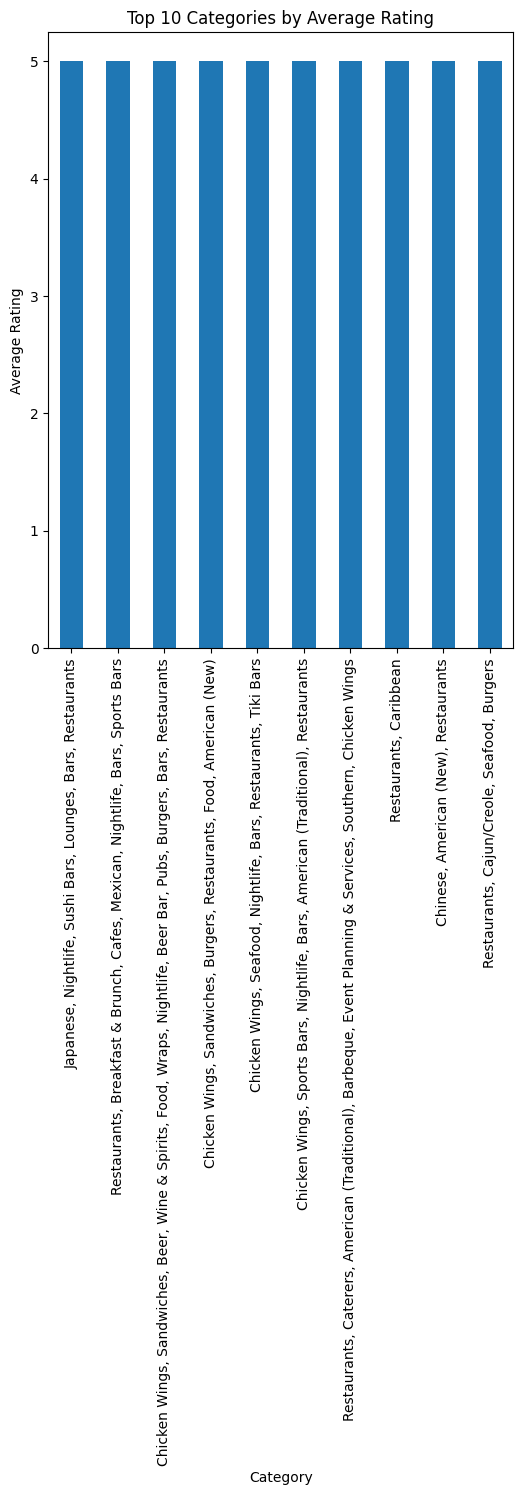

,stars_y
categories,
"Japanese, Nightlife, Sushi Bars, Lounges, Bars, Restaurants",5.0
"Restaurants, Breakfast & Brunch, Cafes, Mexican, Nightlife, Bars, Sports Bars",5.0
"Chicken Wings, Sandwiches, Beer, Wine & Spirits, Food, Wraps, Nightlife, Beer Bar, Pubs, Burgers, Bars, Restaurants",5.0
"Chicken Wings, Sandwiches, Burgers, Restaurants, Food, American (New)",5.0
"Chicken Wings, Seafood, Nightlife, Bars, Restaurants, Tiki Bars",5.0
"Chicken Wings, Sports Bars, Nightlife, Bars, American (Traditional), Restaurants",5.0
"Restaurants, Caterers, American (Traditional), Barbeque, Event Planning & Services, Southern, Chicken Wings",5.0
"Restaurants, Caribbean",5.0
"Chinese, American (New), Restaurants",5.0


In [19]:
# Use bar plots to visualize the average ratings per category
import matplotlib.pyplot as plt

# Get top 10 categories by average rating
top_n = 10
average_ratings_by_category_top10 = combined_df.groupby('categories')['stars_y'].mean().sort_values(ascending=False).head(top_n)

# Bar Plot
plt.figure(figsize=(6, 8))
average_ratings_by_category_top10.plot(kind='bar')
plt.title(f'Top {top_n} Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()
average_ratings_by_category_top10

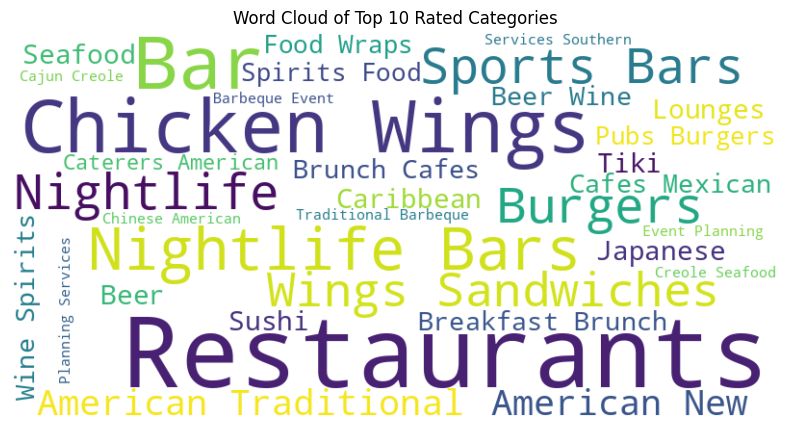

In [20]:
from wordcloud import WordCloud
# Get the top 10 categories
top_10_categories = average_ratings_by_category.head(10)
wordcloud_input = ' '.join([f"{categories} " * int(stars_y) for categories, stars_y in zip(top_10_categories.index, top_10_categories.values)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_input)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 10 Rated Categories')
plt.show()

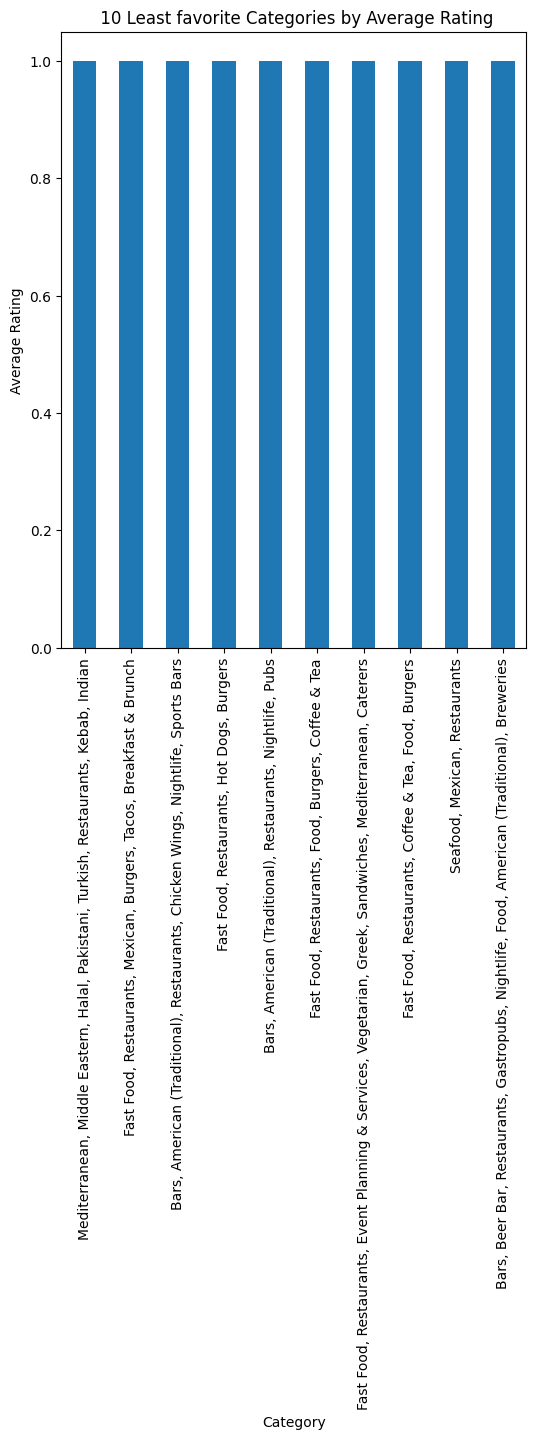

,stars_y
categories,
"Mediterranean, Middle Eastern, Halal, Pakistani, Turkish, Restaurants, Kebab, Indian",1.0
"Fast Food, Restaurants, Mexican, Burgers, Tacos, Breakfast & Brunch",1.0
"Bars, American (Traditional), Restaurants, Chicken Wings, Nightlife, Sports Bars",1.0
"Fast Food, Restaurants, Hot Dogs, Burgers",1.0
"Bars, American (Traditional), Restaurants, Nightlife, Pubs",1.0
"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",1.0
"Fast Food, Restaurants, Event Planning & Services, Vegetarian, Greek, Sandwiches, Mediterranean, Caterers",1.0
"Fast Food, Restaurants, Coffee & Tea, Food, Burgers",1.0
"Seafood, Mexican, Restaurants",1.0


In [21]:
# Get 10 least favorite categories by average rating
least_fav_n = 10
average_ratings_by_category_least10 = combined_df.groupby('categories')['stars_y'].mean().sort_values(ascending=True).head(least_fav_n)

# Plot
plt.figure(figsize=(6, 8))
average_ratings_by_category_least10.plot(kind='bar')
plt.title(f' {least_fav_n} Least favorite Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()
average_ratings_by_category_least10

<ipython-input-22-3d69d7385203>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ratings_by_month = cleaned_df.resample('M', on='date').count().reset_index()


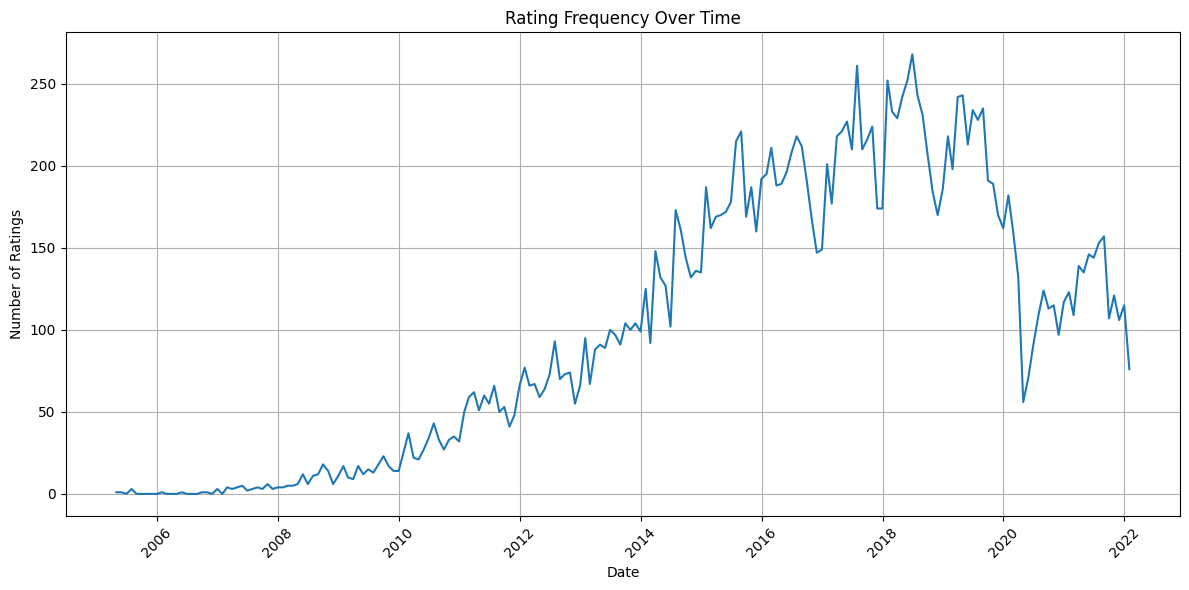

In [22]:
cleaned_df = pd.merge(business_cleaned_df, review_cleaned_df, on='business_id')
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

# Group by month (or any other time period) and count ratings
ratings_by_month = cleaned_df.resample('M', on='date').count().reset_index()

# Plotting the frequency of ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=ratings_by_month, x='date', y='stars_y')
plt.title('Rating Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Encoding

We have used label encoding since it replaces each category with a unique integer, requiring less memory than one-hot encoding. Additionally, it doesn't generate extra columns, which helps keep the dimensionality of the dataset manageable.

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in non_numeric_cols:
  label_encoder = LabelEncoder()
  combined_df[col] = label_encoder.fit_transform(combined_df[col])
  label_encoders[col] = label_encoder

In [24]:
# Select only numeric columns
combined_numeric_df = combined_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = combined_numeric_df.corr()

# Display the correlation of 'stars' with other features
corr_matrix = correlation_matrix['stars_y'].abs().sort_values(ascending=False)
print(corr_matrix)

stars_y                                  1.000000
average_stars                            0.559647
stars_x                                  0.409957
review_count_x                           0.105300
text                                     0.077316
hours.Tuesday                            0.071845
hours.Wednesday                          0.070043
hours.Thursday                           0.068682
hours.Friday                             0.067684
is_open                                  0.061864
attributes.BikeParking                   0.061863
hours.Saturday                           0.058645
hours.Sunday                             0.053400
attributes.RestaurantsPriceRange2        0.051662
cool_x                                   0.050918
attributes.WiFi                          0.038291
attributes.BusinessParking               0.035330
funny_x                                  0.032534
date                                     0.030797
postal_code                              0.028197


In [25]:
# Get top 15 highly correlated features
top_15_features = corr_matrix.head(16).index
top_15_features


Index(['stars_y', 'average_stars', 'stars_x', 'review_count_x', 'text',
       'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday',
       'is_open', 'attributes.BikeParking', 'hours.Saturday', 'hours.Sunday',
       'attributes.RestaurantsPriceRange2', 'cool_x', 'attributes.WiFi'],
      dtype='object')

Top 15 Features: Choosing the top 15 features with the highest absolute correlation with the target.

In [26]:
# Filtering relevant columns to simplicity and avoid overfitting
filtered_features = top_15_features


In [27]:
top_15_corr_matrix = correlation_matrix.loc[top_15_features, top_15_features]

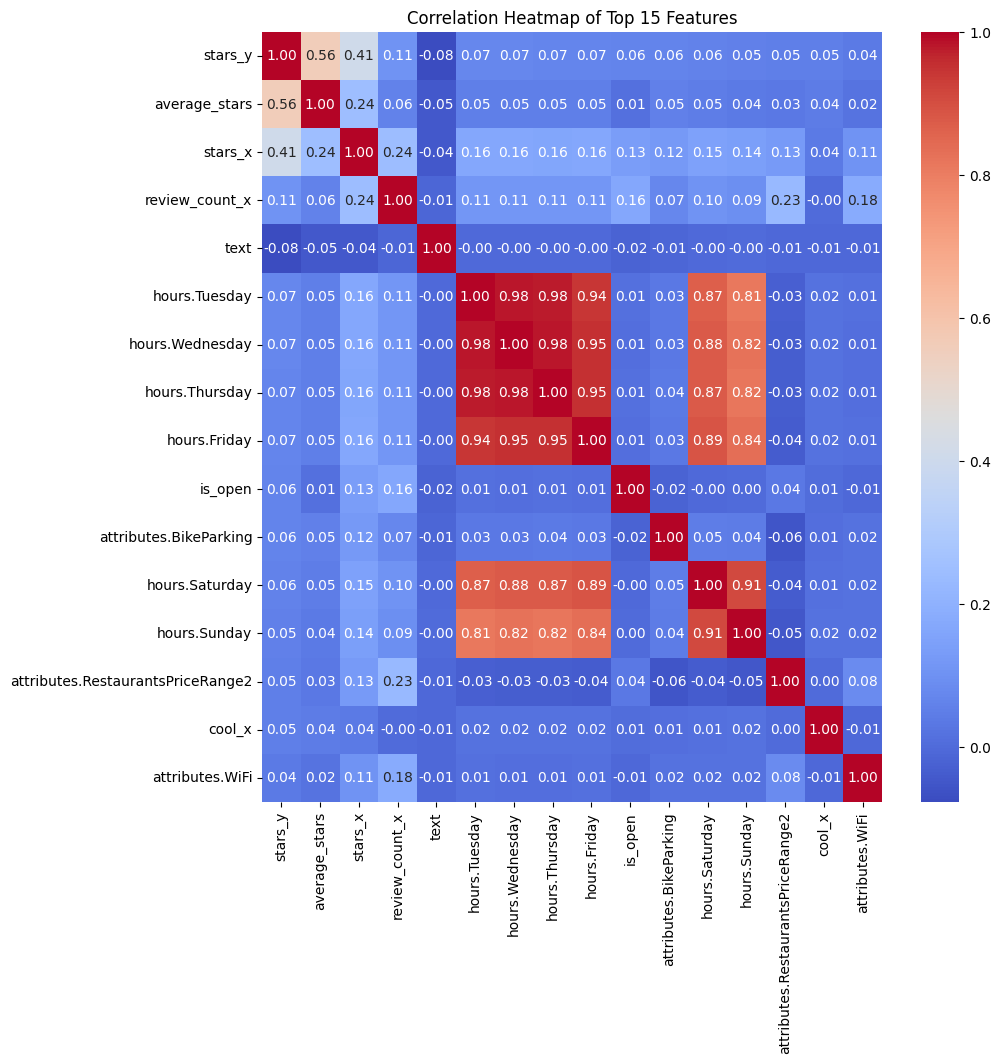

In [28]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(top_15_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Top 15 Features')
plt.show()

In the above heatmap more red suggests postive correlation as these features are highly correlated with each other

# Modeling

Preventing Data Leakage

In [29]:
combined_df1 = combined_df.copy()

y = combined_df1['stars_y']
# Dropping 'stars_x','average_stars' as they are aggregated forms of stars_y to avoid data leakage
X = combined_df1[filtered_features].drop(columns=['stars_y', 'stars_x','average_stars'])


In [30]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Modeling Journey: Trials and What We Learned

We evaluated multiple regression models like Linear Regression, Linear Regression with Regularization,Random Forest with Grid Search CV, Random Forest with Random Search CV, XGBoost Grid Search CV and XGBoost Random Search CV machine learning techniques to identify the best-fit model for predicting ratings.

## Baseline model: Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# Apply feature scaling to standardize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Using Ridge regression to handle multicollinearity
# Create and fit Ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = ridge_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 1.9336123634131321
Root Mean Squared Error: 1.3905439091999692


## Random Forest

Used hyperparamter tuning with cross validation for better model performace and error reduction

### Random Forest Method 1: RandomSearchCV


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100,200],'max_depth': [None,10],}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,n_iter=3, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

# Fit Grid Search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Best Parameters: {random_search.best_params_}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Best Parameters: {'n_estimators': 200, 'max_depth': 10}
Mean Absolute Error: 1.1033718589068633
Mean Squared Error: 1.7572177357610628
Root Mean Squared Error: 1.325600896107521
R-squared: 0.11198640406485016


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Method 2: GridSearchCV



In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators': [100,200],'max_depth': [None,10],}


#Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Mean Absolute Error: 1.1042917443310032
Mean Squared Error: 1.7593700428080556
Root Mean Squared Error: 1.3264124708430842
R-squared: 0.11089873127310645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
# Feature importance
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
1,text,0.319923
0,review_count_x,0.222176
11,cool_x,0.075355
9,hours.Sunday,0.073478
8,hours.Saturday,0.061141
2,hours.Tuesday,0.047679
5,hours.Friday,0.045995
3,hours.Wednesday,0.041488
4,hours.Thursday,0.039899
12,attributes.WiFi,0.028330


## XGBoost

Since the R value is low in Random Forest, that led us to try XGBoost.

### XGBoost Method 1: RandomizedSearchCV

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor()

# Hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   scoring='r2', n_iter=10, cv=3, n_jobs=-1, random_state=0)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Best Parameters: {random_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Best Parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 10, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}
Mean Squared Error: 1.7280432386261966
Root Mean Squared Error: 1.314550584278215
R-squared: 0.1267297961801771


### XGBoost Method 2: GridSearchCV

In [40]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()

# Hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 9],
    'subsample': [1.0],
    'colsample_bytree': [0.6],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_dist,
                           scoring='r2', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 1.687652010548769
Root Mean Squared Error: 1.2990966132465933
R-squared: 0.1267297961801771


# Best-performing model

We found **XGBoost GridSearch CV**, an advanced gradient boosting technique is the best-performing model than the other models in this analysis based on the performance metrics. We learned that R values can be low when the target value is small.

In [41]:
#XGBoost: GridSearchCV

model = XGBRegressor()

# Hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 9],
    'subsample': [1.0],
    'colsample_bytree': [0.6],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_dist,
                           scoring='r2', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 1.687652010548769
Root Mean Squared Error: 1.2990966132465933
R-squared: 0.1267297961801771


## Feature Importance
Key features in the business profile/customer profile that influence a
customer's impression of a business based on the findings from the best-performing model:
 ⚛ Cool reviews, Review count, Bike Parking, Open hours(Thursday, Saturday, Sunday, Wednesday, Tuesday and Friday), Restaurants Price Range and WIFI availability.

In [42]:
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
11,cool_x,0.146237
1,text,0.136517
0,review_count_x,0.095607
7,attributes.BikeParking,0.070240
4,hours.Thursday,0.069039
8,hours.Saturday,0.068874
9,hours.Sunday,0.065258
6,is_open,0.064848
3,hours.Wednesday,0.061497
2,hours.Tuesday,0.058794


# Decoding

In [43]:
#Decoding
# To decode a specific column
def decode_column(column_name, encoded_values):
    if column_name in label_encoders:
        return label_encoders[column_name].inverse_transform(encoded_values)
    else:
        raise ValueError(f"No encoder found for column: {column_name}")


In [44]:
encoded_bus_id = combined_df['business_id'].values
original_bus_id = decode_column('business_id', encoded_bus_id)
combined_df1['business_id'] = original_bus_id

encoded_user_id = combined_df['user_id'].values
original_user_id = decode_column('user_id', encoded_user_id)
combined_df1['user_id'] = original_user_id

encoded_bus_values = combined_df['name_x'].values
original_bus_name = decode_column('name_x', encoded_bus_values)
combined_df1['business_name'] = original_bus_name

encoded_user_values = combined_df['name_y'].values
original_user_name = decode_column('name_y', encoded_user_values)
combined_df1['user_name'] = original_user_name



# Predicted vs Actual

In [45]:
predictions_df = pd.DataFrame({'business_id': combined_df1.loc[X_test.index, 'business_id'],'business_name': combined_df1.loc[X_test.index, 'business_name'],'user_id': combined_df1.loc[X_test.index, 'user_id'],'user_name': combined_df1.loc[X_test.index, 'user_name'], 'predicted_rating': y_pred})
predictions_df

,business_id,business_name,user_id,user_name,predicted_rating
14266,THoNnFJFVzzjz7hyOIQFkQ,Urban Pita,VCd6oQFwDBiUmgHAQC6htQ,Chris,4.295277
17958,tP1x4ntwlFfQBI1ozbBinw,Britt's Coal Fire Pizza,HcZrUe6CT3yFdutLRycYDA,Emily,2.463994
4197,mOAzyqS3WLZsXAuLzrktWA,Peppers By Amedeo's,-hDO7zxVO7fPHcZtWN0kJA,Joseph,3.141054
18428,JNBuXPEjE3eavcIUvUc49A,Yard House,dyE7XTqd-a3oVwhREK9D_Q,Jennifer,3.815342
5572,9TDyIOrSrncpsAUxVqx3aA,Capdeville,qpFCY_wj8_G-HOV8MxIaHw,Paul,3.828172
...,...,...,...,...,...
8769,mkR4wRGnEh66H_EAFq44TA,Aroma Indian Grill,hEVVb1YildjRPmLblC5ItA,Gaurav,4.468656
9047,zf9_8CskW6Vzakg6V78S0g,Crazy Cafe,Rx2351DgpGlhOp1lO9Hkuw,Brian,3.583414
8440,mYMPepp0QIZRk_52pWzeoA,Seasons 52,fdT4J3_dmCBYqPBP36POdQ,Barefoot,4.008131
15738,entPgyZ2zCQ_WWmQdMVhww,Taki,oQWTmcIDJ-t9qsEC7-TIGA,Aaron,4.237842


In [46]:
actual_df = combined_df1[['business_id','business_name','user_id', 'user_name','stars_y']].copy()
actual_df

,business_id,business_name,user_id,user_name,stars_y
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,MaueOwM1-iPoOaA5F6a5xA,Melissa,4.0
1,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,yvtGZq3hdP0gaM96RjBAZQ,Theodore,5.0
2,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,sBTp3GPH2-YomCo-9-BWhw,John,1.0
3,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,Vd635n-lj0V8fkwBKYoYZg,Jane,2.0
4,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,m1BRUvq-ALKsM5WP2zjypg,Richard,1.0
...,...,...,...,...,...
20121,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,kXfgO6atYxDViqU3-p5V2g,Brian,4.0
20122,8n93L-ilMAsvwUatarykSg,Kitchen Gia,Q29HIdum2E2HUoRCVLqOag,ana,4.0
20123,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,ZwwbwsPgk8sqFogVUT31EQ,Amy,5.0
20124,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,Vp625JzUtViYSLzlq23sNw,Donna,4.0


# Insights from the model

**Identify Risky Customers**: Using the predicted user's rating, business can take preventive steps/measures to improve their business rating by creating better users personal experience with that business if a customer's predicted rating for a business is low. They can give out some curated and targeted offers to the at-risk group of customers.

In [47]:
# Identify Risky Customers
low_rating_threshold = 2.0  # threshold for low predicted ratings
at_risk_customers = predictions_df[predictions_df['predicted_rating'] < low_rating_threshold]

# Display at-risk customers
print("At-Risk Customers:")
display(at_risk_customers)

At-Risk Customers:


,business_id,business_name,user_id,user_name,predicted_rating
2910,lPOS2nfG4TuOFQmBEOiNwQ,Blue Duck On Broad,k1If__BD3p4FFE5DUfnu2Q,Christine,1.725215
9935,mtjU2H7EbvkJ0gGjC8yG1A,Denny's,0LEljTJ6pt9tz_Hr1sYppA,Lisa,1.788105
1978,g_0U8kzf5iTMJ-I9E3MWlA,McDonald's,oYn4yU4hI8w9vMQkR9bx1w,Chet,1.567858
17235,Gu-8WeGWVs5qMVGjVgTA1A,Applebee's Grill + Bar,RNpCZnjbksOpoxbOkwZNCw,Frank,1.863326
11734,orbXZK6M1NoCb2r5wqwXhw,Bob Evans,4UL4RNypqXcKPd7hXwCBIQ,Sam,1.966089
8492,JSMvJtdPVGgq9xfc298QVw,New England Pizza,MGWlYKINfjqEuiOFqyc-ag,Kyle,1.872725
15500,cml-Rgal21NkTbQUPJ4TIQ,TGI Fridays,VIsXrb0AEpoCR1Nk56uuCQ,Steven,1.624173
11693,xhmgQtl9gooBJybCuXBZPA,Dunkin',k-YoiQ-jluDwQzNUVW3f7Q,J,1.829790
6428,8ynnZAfsIHltv72hiM-rlA,DoubleTree Suites by Hilton Hotel Philadelphia...,Y7XehUFspCsa3a-LstgYkA,Thomas,1.992873
8898,h4emxpoA_pQ-Si8fSzzLig,Perkins Restaurant & Bakery,t858DG3vxIXuC-dtHwgPTw,Emma,1.813928


**Engagement Offers:** For businesses with high predicted ratings they can consider initiatives to maintain engagement such as loyalty programs or exclusive offers.

In [48]:
#Engagement Initiatives
high_rating_threshold = 4.0  # threshold for high predicted ratings
high_engagement_customers = predictions_df[predictions_df['predicted_rating'] >= high_rating_threshold]

# Display satisfied/loyal customers
print("Loyal Customers:")
display(high_engagement_customers)

Loyal Customers:


,business_id,business_name,user_id,user_name,predicted_rating
14266,THoNnFJFVzzjz7hyOIQFkQ,Urban Pita,VCd6oQFwDBiUmgHAQC6htQ,Chris,4.295277
1272,htO_nlxkEsYHzDrtbiUxew,La Colombe Coffee,hf_zhIW6zUiOy_rOajmh4g,Ted,4.193380
8223,VxgsJiCUjT4tVUjhjBrIxQ,Subway,QP1pO2KpLnSSNLDnLgNyFw,Amanda,4.065351
5996,LNHq9WxfhN2UBNOR2tnRQQ,Corropolese Bakery & Deli,ZazmEpYZB6sTVZTwbZtHrA,Dominique,4.888814
1710,6mnotS2bl54IN7ofeoJqgQ,Taqueria Los 3 Toritos,VSeDKcjQBZjIjNxP9_w_lA,Cheyenne,4.162844
...,...,...,...,...,...
8144,YaLKDgS_zIYIm6jkXWCxgA,Rustica,W1PwuOqzqRE6YdH4YC24LQ,Micaela,4.300223
3537,O_0H42Bw8hBduWSADPG8ng,Three Kings Public House,fnhHle0w7SJ01UhgiZ644g,Anthony,4.374357
8769,mkR4wRGnEh66H_EAFq44TA,Aroma Indian Grill,hEVVb1YildjRPmLblC5ItA,Gaurav,4.468656
8440,mYMPepp0QIZRk_52pWzeoA,Seasons 52,fdT4J3_dmCBYqPBP36POdQ,Barefoot,4.008131


In [49]:
# For Tableau visualization
#pred_df = predictions_df.merge(actual_df, on='business_id', how= 'left',suffixes=('_predicted', '_actual'))
#pred_df.to_csv('pred_data.csv', index=False)